In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv

In [26]:
G = nx.Graph()

csvfile = open('web-spam.csv','rt')
reader = csv.reader(csvfile)

for i in reader:
    points = i[0].split(' ')
    A = points[0]
    B = points[1]
    if A not in G:
        G.add_node(A)
    if B not in G:
        G.add_node(B)
    G.add_edge(A, B)
    
print('图中节点的个数', G.number_of_nodes())
print('图中节点的个数', G.number_of_edges())

图中节点的个数 4767
图中节点的个数 37375


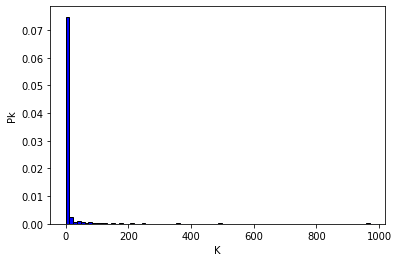

In [104]:
# 度分布
degree =  nx.degree_histogram(G)          
plt.hist(degree, bins=80, density=1, facecolor="blue", edgecolor="black")  
plt.xlabel("K")
plt.ylabel("Pk")
plt.savefig('degree.png')
plt.show()                                                        

In [56]:
bc= nx.centrality.betweenness_centrality(G,normalized=False)

In [57]:
import operator
bc_list = sorted(bc.items(), key=operator.itemgetter(1))
print(bc_list)

[('1581', 0.0), ('1575', 0.0), ('2545', 0.0), ('2740', 0.0), ('5', 0.0), ('6', 0.0), ('959', 0.0), ('9', 0.0), ('10', 0.0), ('276', 0.0), ('485', 0.0), ('629', 0.0), ('767', 0.0), ('1174', 0.0), ('1257', 0.0), ('1576', 0.0), ('1765', 0.0), ('2022', 0.0), ('2198', 0.0), ('2422', 0.0), ('2709', 0.0), ('3853', 0.0), ('4006', 0.0), ('4123', 0.0), ('4139', 0.0), ('4257', 0.0), ('1335', 0.0), ('18', 0.0), ('19', 0.0), ('3791', 0.0), ('22', 0.0), ('4529', 0.0), ('4400', 0.0), ('27', 0.0), ('76', 0.0), ('2466', 0.0), ('240', 0.0), ('3272', 0.0), ('30', 0.0), ('34', 0.0), ('2695', 0.0), ('2547', 0.0), ('2625', 0.0), ('3125', 0.0), ('43', 0.0), ('649', 0.0), ('1922', 0.0), ('2184', 0.0), ('65', 0.0), ('3369', 0.0), ('69', 0.0), ('72', 0.0), ('74', 0.0), ('75', 0.0), ('79', 0.0), ('83', 0.0), ('1436', 0.0), ('2065', 0.0), ('91', 0.0), ('92', 0.0), ('94', 0.0), ('1640', 0.0), ('1102', 0.0), ('2244', 0.0), ('2697', 0.0), ('3201', 0.0), ('98', 0.0), ('103', 0.0), ('837', 0.0), ('106', 0.0), ('1905',

In [62]:
btw=[]
for i in bc_list:
    btw.append(i[1])
print(len(btw))

4767


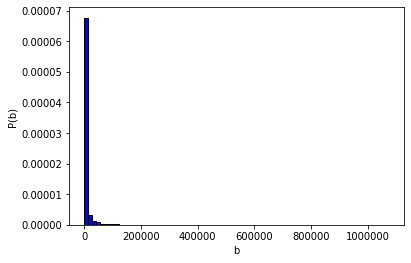

In [103]:
# 介数分布
plt.hist(btw, bins=80, density=1, facecolor="blue", edgecolor="black")  
plt.xlabel("b")
plt.ylabel("P(b)")
plt.savefig('Betweenness.png')
plt.show()                                                        

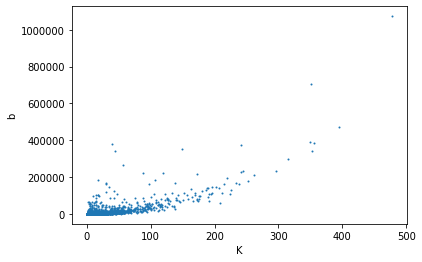

In [102]:
# 度 vs 介数
degree =  nx.degree(G)

b = []
for i in degree:
    b.append(i[1])

K = []
for i in bc:
    K.append(bc[i])

plt.scatter(b, K, s = 1)
plt.xlabel("K")
plt.ylabel("b")
plt.savefig('K VS b.png')
plt.show()

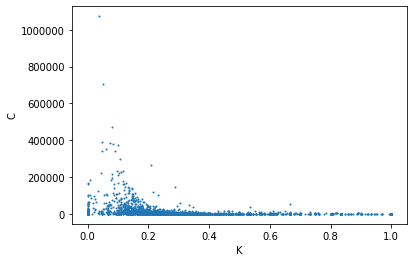

<Figure size 432x288 with 0 Axes>

In [101]:
cluster = nx.clustering(G)

C = []
for i in cluster:
    C.append(cluster[i])
plt.scatter(C, K, s = 1)
plt.xlabel("K")
plt.ylabel("C")
plt.show()
plt.savefig('K VS C.png')